<a href="https://colab.research.google.com/github/UPASNA-AGGARWAL/HEART_DISEASE_CLASSIFICATION/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Amidst the rising demand for AI applications in medicine, this project focuses on employing machine learning algorithms, such as Random Forest, SVM, and Gradient Boosting, to predict heart disease based on patient data. Recognizing the global prevalence of cardiovascular issues, the project aims to enhance diagnostic capabilities. By harnessing the power of data-driven insights and visualization techniques, it strives to contribute to the broader adoption of AI in healthcare, addressing the critical need for accurate and efficient cardiovascular disease prediction in today's dynamic medical landscape.***




   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
     variable  count
0         age     41
1         sex      2
2          cp      4
3    trestbps     50
4        chol    152
5         fbs      2
6     restecg      3
7     thalach     91
8       exang      2
9     oldpeak     40
10      slope      3
11         ca      4
12       thal      3
13  condition      2


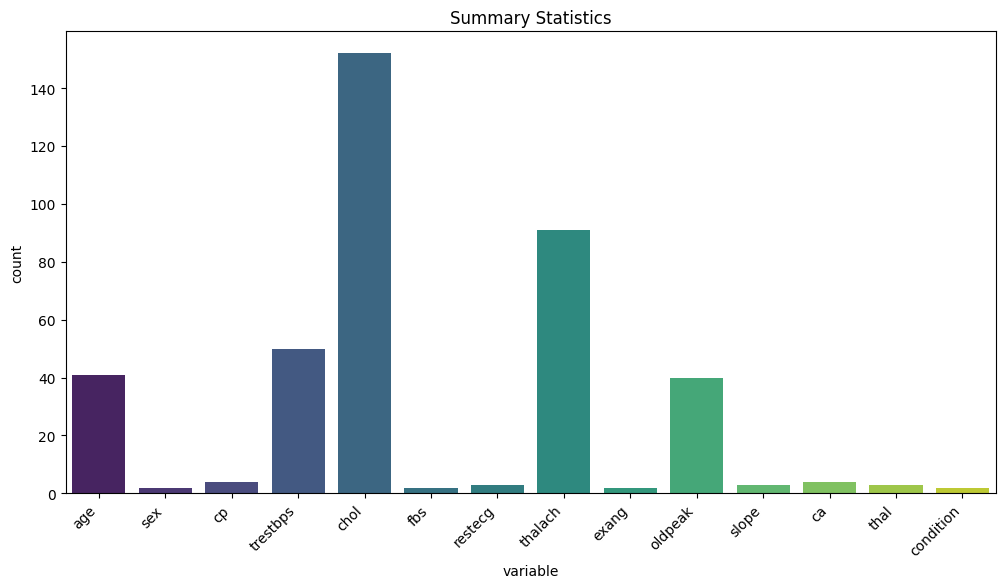

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
heart_disease_data = pd.read_csv("/content/heart_cleveland_upload.csv")
print(heart_disease_data.head())
# Summary statistics
summary_stats = heart_disease_data.agg({
    'age': 'nunique',
    'sex': 'nunique',
    'cp': 'nunique',
    'trestbps': 'nunique',
    'chol': 'nunique',
    'fbs': 'nunique',
    'restecg': 'nunique',
    'thalach': 'nunique',
    'exang': 'nunique',
    'oldpeak': 'nunique',
    'slope': 'nunique',
    'ca': 'nunique',
    'thal': 'nunique',
    'condition': 'nunique'
}).reset_index().rename(columns={'index': 'variable', 0: 'count'})
print(summary_stats)
plt.figure(figsize=(12, 6))
sns.barplot(x='variable', y='count', data=summary_stats, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Summary Statistics')
plt.show()


The code reads heart disease data, prints the first few rows, and generates summary statistics, counting unique values for each attribute. It then creates a bar plot visualizing the uniqueness count for various features, providing a concise overview of the dataset's characteristics.

<ipython-input-33-44d24fc3e155>:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




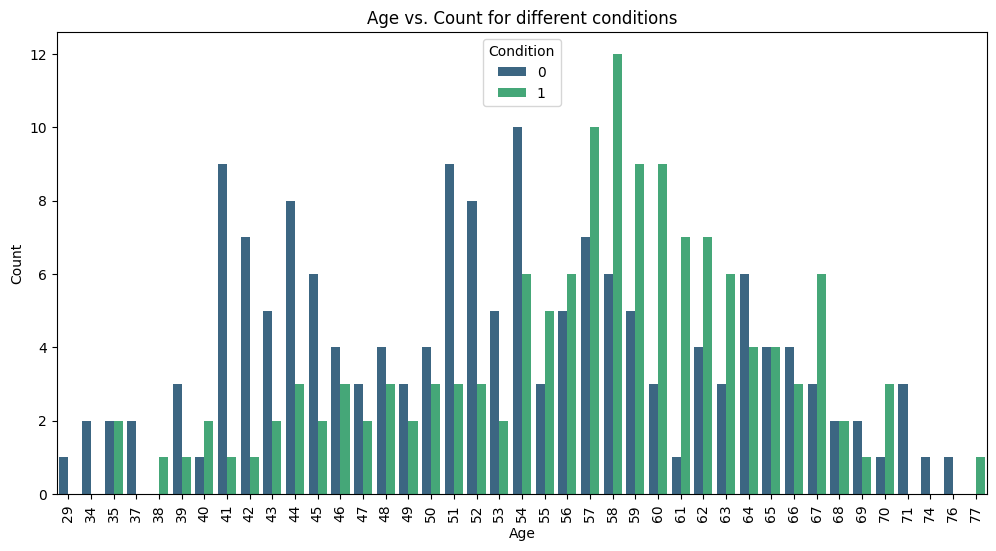

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Plot Age vs. Count for different conditions
plt.figure(figsize=(12, 6))
sns.barplot(data=heart_disease_data.groupby(['age', 'condition']).size().reset_index(name='count'),
            x='age', y='count', hue='condition', palette='viridis', ci=None)
plt.xticks(rotation=90)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age vs. Count for different conditions')
plt.legend(title='Condition')
plt.show()

Here we creates a bar plot illustrating the distribution of age across various health conditions. Each bar represents the count of occurrences for a specific age and condition, providing a visual comparison of how age relates to different health states in the dataset.

<ipython-input-34-ba26ab813092>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




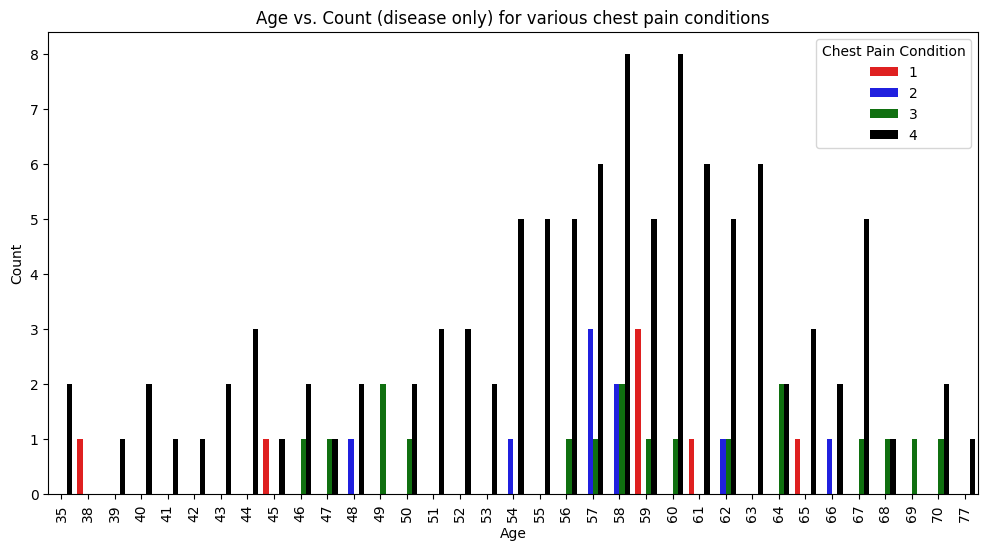

In [ ]:
# Plot Age vs. Count for various chest pain conditions (disease only)
plt.figure(figsize=(12, 6))
sns.barplot(data=heart_disease_data[heart_disease_data['condition'] == 1].groupby(['age', 'cp']).size().reset_index(name='count'),
            x='age', y='count', hue='cp', palette=['red', 'blue', 'green', 'black'], ci=None)
plt.xticks(rotation=90)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age vs. Count (disease only) for various chest pain conditions')
plt.legend(title='Chest Pain Condition', labels=['1', '2', '3', '4'])
plt.show()

The code generates a bar plot specifically for individuals with heart disease, displaying the relationship between age and the count of occurrences for different chest pain conditions. Each bar corresponds to a specific age group and chest pain condition, using distinct colors for clarity. This visualization aims to explore how age correlates with chest pain conditions in individuals diagnosed with heart disease.

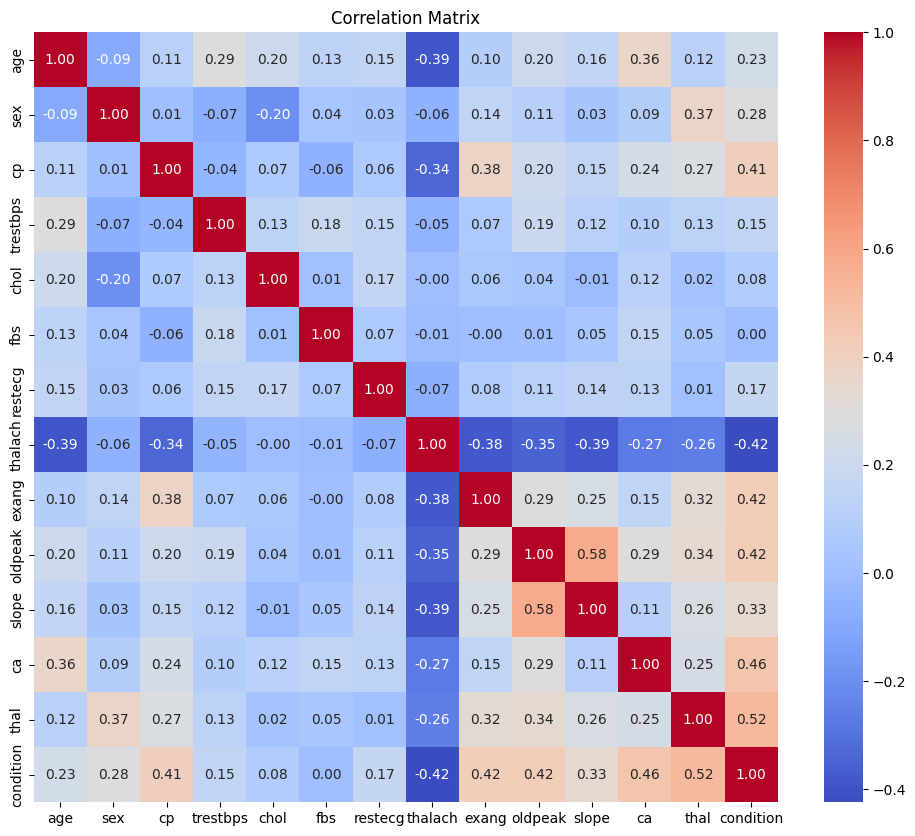

In [ ]:
# Calculate and display the correlation matrix
cor_matrix = heart_disease_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

It computes and visualizes the correlation matrix for the heart disease dataset. The heatmap illustrates the pairwise correlations between different attributes. The color intensity and values indicate the strength and direction of the relationships, providing insights into potential associations among variables in the dataset.








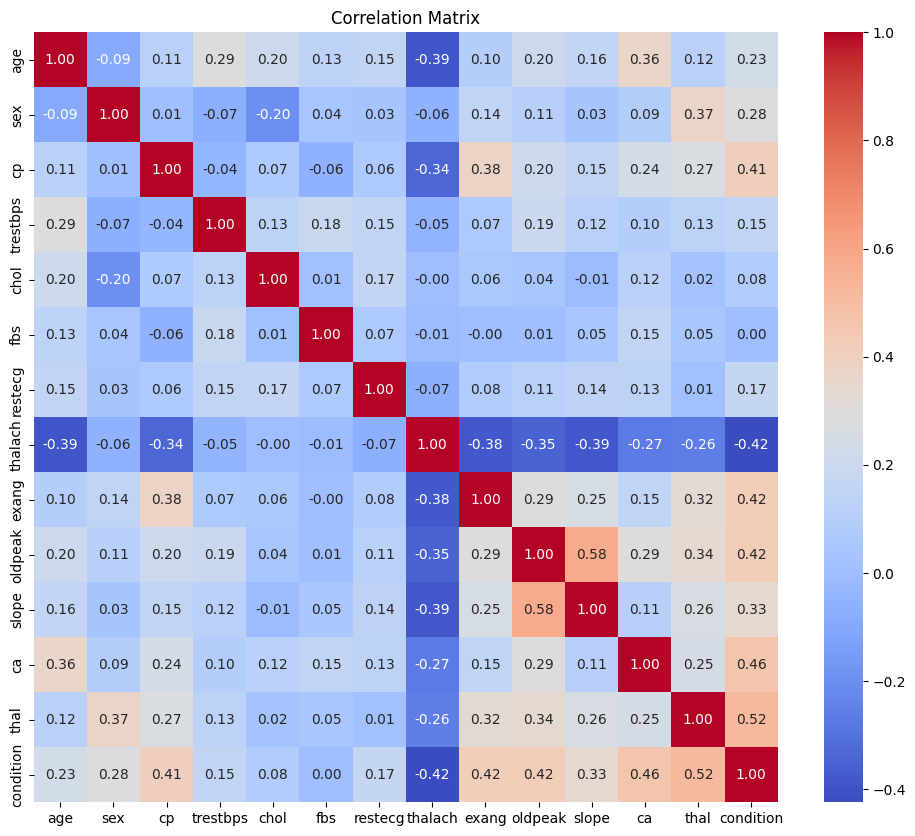

In [ ]:
import plotly.express as px
# Calculate the correlation matrix
cor_matrix = heart_disease_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
# Plot Age vs. Sex Map using ggballoonplot equivalent in Python (plotly)
fig = px.scatter(heart_disease_data, x="age", y="sex", size="chol", color="condition",
                 size_max=30, opacity=0.7, labels={'chol': 'Size', 'condition': 'Condition'},
                 title='Age vs. Sex Map')
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGray')))
fig.show()


The code first generates a heatmap visualizing the correlation matrix of the heart disease dataset using Seaborn. Then, it utilizes Plotly Express to create a scatter plot with a balloon size effect, representing the relationship between age and sex. The plot's color is determined by the health condition, and the size is proportional to cholesterol levels. This interactive Age vs. Sex Map provides a dynamic exploration of these variables in the dataset.

In [ ]:
import plotly.express as px
from sklearn.model_selection import train_test_split
# Plot Age vs. Chest Pain Map by Sex using ggballoonplot equivalent in Python (plotly)
fig = px.scatter(heart_disease_data, x="age", y="cp", size="chol", color="sex",
                 size_max=30, opacity=0.7, labels={'chol': 'Size', 'sex': 'Sex'},
                 title='Age vs. Chest Pain Map by Sex')
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGray')))
fig.show()
# Divide into train and validation dataset
train_set, validation_set = train_test_split(heart_disease_data, test_size=0.2, random_state=2020)


We have used Plotly Express to create an interactive scatter plot with a balloon size effect, illustrating the relationship between age and chest pain types based on gender. The color of the points indicates the gender, while the size corresponds to cholesterol levels. Additionally, the dataset is then divided into training and validation sets using scikit-learn's train_test_split function for further analysis.

Confusion Matrix for LDA:
[[24  1]
 [ 9 26]]


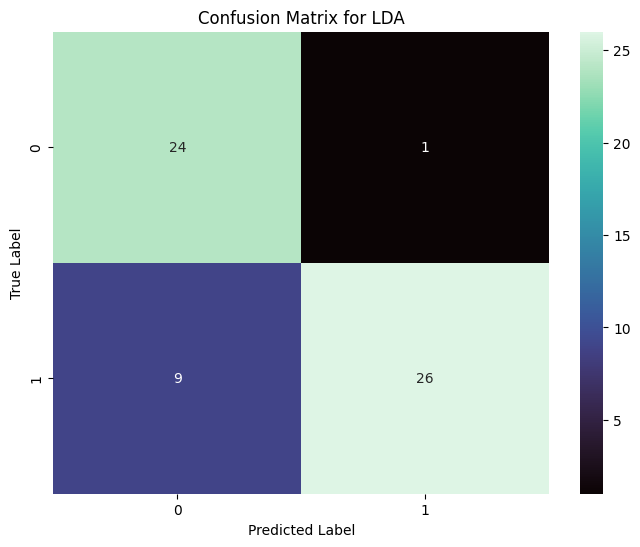

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
# Convert dependent variable to a factor
heart_disease_data['condition'] = heart_disease_data['condition'].astype('category')

# Dividing into train and validation datasets
train_set, validation = train_test_split(heart_disease_data, test_size=0.2, random_state=2020)

# Linear Discriminant Analysis (LDA)
lda_fit = LinearDiscriminantAnalysis().fit(train_set.drop(columns=['condition']), train_set['condition'])
lda_predict = lda_fit.predict(validation.drop(columns=['condition']))
lda_conf_matrix = confusion_matrix(validation['condition'], lda_predict)
print("Confusion Matrix for LDA:")
print(lda_conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(lda_conf_matrix, annot=True, fmt='d', cmap='mako', xticklabels=lda_fit.classes_, yticklabels=lda_fit.classes_)
plt.title('Confusion Matrix for LDA')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()




In this code we implements Linear Discriminant Analysis (LDA) for heart disease prediction. It converts the dependent variable to a categorical type, splits the dataset into training and validation sets, and then trains an LDA model. The confusion matrix is calculated and displayed, providing insights into the model's predictive performance. The heatmap visualizes true and predicted labels, aiding in the evaluation of LDA's accuracy in diagnosing heart conditions.

Confusion Matrix for QDA:
[[21  4]
 [ 9 26]]


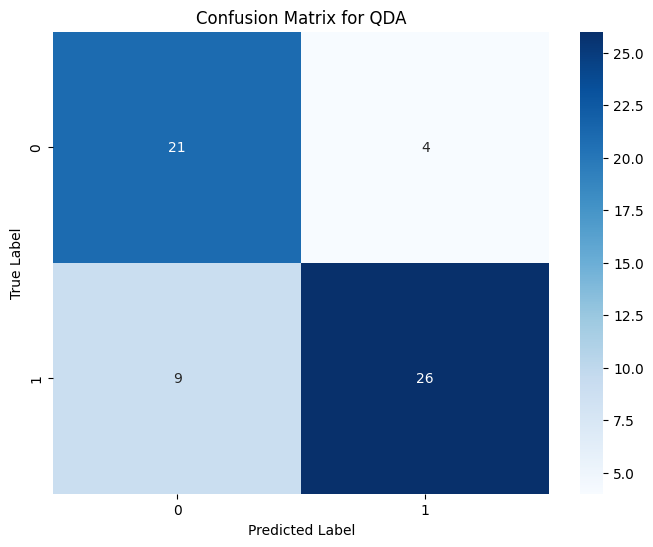

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
# Convert dependent variable to a factor
heart_disease_data['condition'] = heart_disease_data['condition'].astype('category')
train_set, validation = train_test_split(heart_disease_data, test_size=0.2, random_state=2020)
# Quadratic Discriminant Analysis (QDA)
qda_fit = QuadraticDiscriminantAnalysis().fit(train_set.drop(columns=['condition']), train_set['condition'])
qda_predict = qda_fit.predict(validation.drop(columns=['condition']))
# Confusion Matrix for QDA
qda_conf_matrix = confusion_matrix(validation['condition'], qda_predict)
print("Confusion Matrix for QDA:")
print(qda_conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(qda_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=qda_fit.classes_, yticklabels=qda_fit.classes_)
plt.title('Confusion Matrix for QDA')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


This code employs Quadratic Discriminant Analysis (QDA) for heart disease prediction. It first converts the dependent variable to a categorical type and splits the dataset into training and validation sets. The QDA model is trained, and the resulting confusion matrix is printed and visualized using a heatmap. This allows for an assessment of QDA's effectiveness in accurately predicting heart disease conditions based on the given dataset.

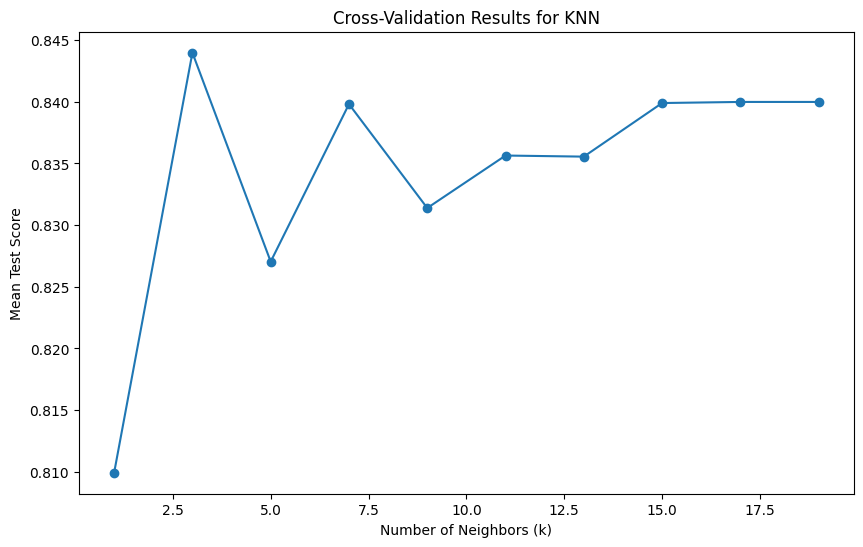


Confusion Matrix for KNN:
[[22  3]
 [ 9 26]]


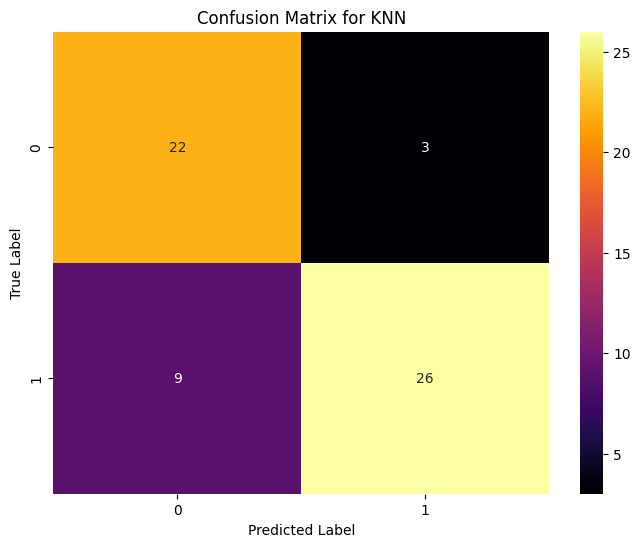

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix
# Convert dependent variable to a factor
heart_disease_data['condition'] = heart_disease_data['condition'].astype('category')
train_set, validation = train_test_split(heart_disease_data, test_size=0.2, random_state=2020)
scaler = StandardScaler()
knn = KNeighborsClassifier()
# Use GridSearchCV for hyperparameter tuning
param_grid = {'n_neighbors': list(range(1, 20, 2))}
knn_fit = GridSearchCV(knn, param_grid, cv=5).fit(scaler.fit_transform(train_set.drop(columns=['condition'])), train_set['condition'])
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_neighbors'], knn_fit.cv_results_['mean_test_score'], marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Test Score')
plt.title('Cross-Validation Results for KNN')
plt.show()
# Make predictions on the validation set
knn_predict = knn_fit.predict(scaler.transform(validation.drop(columns=['condition'])))

knn_conf_matrix = confusion_matrix(validation['condition'], knn_predict)
print("\nConfusion Matrix for KNN:")
print(knn_conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='inferno', xticklabels=knn_fit.classes_, yticklabels=knn_fit.classes_)
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


This code utilizes the K-Nearest Neighbors (KNN) algorithm for heart disease prediction. The dependent variable is converted to a categorical type, and the dataset is split into training and validation sets. Standard scaling is applied to normalize the features, and GridSearchCV is used for hyperparameter tuning. The cross-validation results for different numbers of neighbors (k) are visualized. The final KNN model is then evaluated using a confusion matrix on the validation set, offering insights into its predictive performance for heart disease conditions

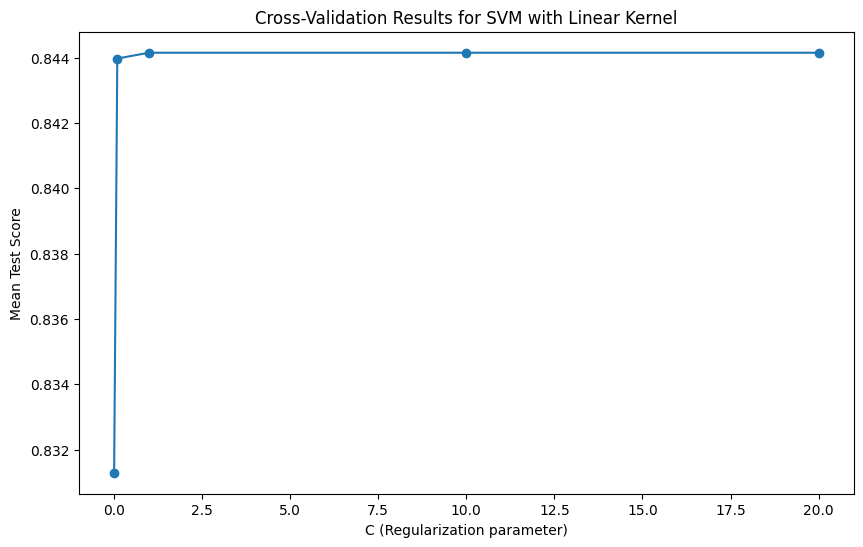


Confusion Matrix for SVM:
[[22  3]
 [ 9 26]]


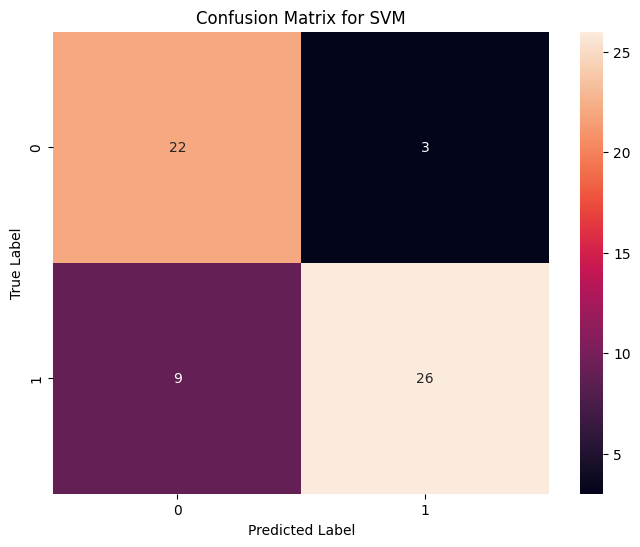

In [ ]:
heart_disease_data['condition'] = heart_disease_data['condition'].astype('category')
train_set, validation = train_test_split(heart_disease_data, test_size=0.2, random_state=2020)

# Support Vector Machine (SVM) with Linear Kernel
scaler = StandardScaler()
svm = SVC(kernel='linear')

# Use GridSearchCV for hyperparameter tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 20]}
svm_fit = GridSearchCV(svm, param_grid, cv=5).fit(scaler.fit_transform(train_set.drop(columns=['condition'])), train_set['condition'])

# Plot the cross-validation results for SVM
plt.figure(figsize=(10, 6))
plt.plot(param_grid['C'], svm_fit.cv_results_['mean_test_score'], marker='o')
plt.xlabel('C (Regularization parameter)')
plt.ylabel('Mean Test Score')
plt.title('Cross-Validation Results for SVM with Linear Kernel')
plt.show()
# Make predictions on the validation set
svm_predict = svm_fit.predict(scaler.transform(validation.drop(columns=['condition'])))

# Confusion Matrix for SVM
svm_conf_matrix = confusion_matrix(validation['condition'], svm_predict)
print("\nConfusion Matrix for SVM:")
print(svm_conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='rocket', xticklabels=svm_fit.classes_, yticklabels=svm_fit.classes_)
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


This code implements a Support Vector Machine (SVM) with a linear kernel for heart disease prediction. The dependent variable is converted to a categorical type, and the dataset is split into training and validation sets. Standard scaling is applied for feature normalization, and GridSearchCV is used for hyperparameter tuning with varying regularization parameter values (C). The cross-validation results are plotted to visualize the model's performance across different regularization parameters. The final SVM model is evaluated using a confusion matrix on the validation set, offering insights into its accuracy in predicting heart disease conditions.








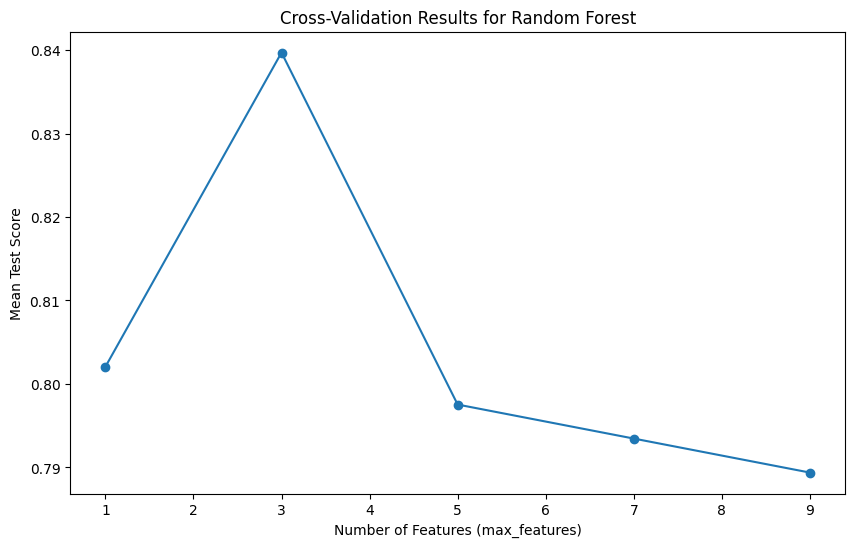


Confusion Matrix for Random Forest:
[[21  4]
 [12 23]]


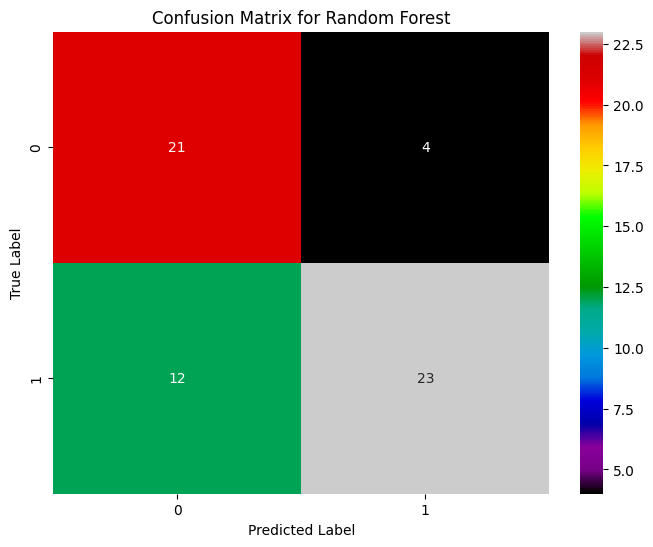

In [ ]:
heart_disease_data['condition'] = heart_disease_data['condition'].astype('category')
train_set, validation = train_test_split(heart_disease_data, test_size=0.2, random_state=2020)

# Random Forest (RF)
param_grid = {'n_estimators': [20], 'max_features': list(range(1, 11, 2))}
rf = RandomForestClassifier(random_state=2020)
rf_fit = GridSearchCV(rf, param_grid, cv=5).fit(train_set.drop(columns=['condition']), train_set['condition'])

# Plot the cross-validation results for RF
plt.figure(figsize=(10, 6))
plt.plot(param_grid['max_features'], rf_fit.cv_results_['mean_test_score'], marker='o')
plt.xlabel('Number of Features (max_features)')
plt.ylabel('Mean Test Score')
plt.title('Cross-Validation Results for Random Forest')
plt.show()

# Make predictions on the validation set
rf_predict = rf_fit.predict(validation.drop(columns=['condition']))

# Confusion Matrix for RF
rf_conf_matrix = confusion_matrix(validation['condition'], rf_predict)
print("\nConfusion Matrix for Random Forest:")
print(rf_conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='nipy_spectral', xticklabels=rf_fit.classes_, yticklabels=rf_fit.classes_)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Here code applies the Random Forest (RF) algorithm for heart disease prediction. The dependent variable is converted to a categorical type, and the dataset is split into training and validation sets. GridSearchCV is used for hyperparameter tuning, specifically adjusting the number of trees (n_estimators) and the maximum number of features (max_features). The cross-validation results for different max_features values are visualized. The final RF model is then evaluated using a confusion matrix on the validation set, providing insights into its performance in predicting heart disease conditions.

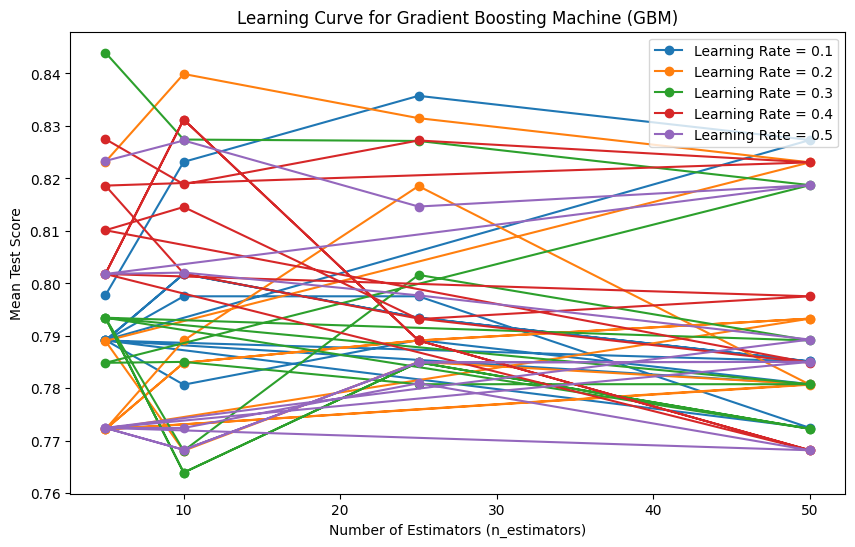


Confusion Matrix for Gradient Boosting Machine (GBM):
[[21  4]
 [12 23]]


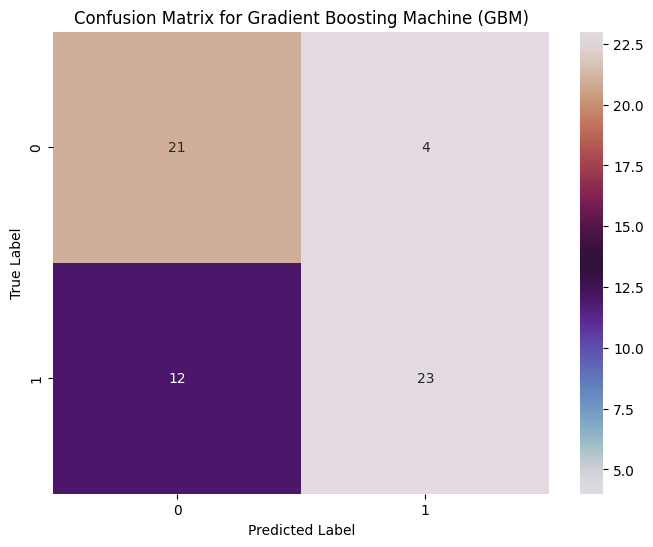

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix
heart_disease_data['condition'] = heart_disease_data['condition'].astype('category')
train_set, validation = train_test_split(heart_disease_data, test_size=0.2, random_state=2020)

# Gradient Boosting Machine (GBM)
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
    'n_estimators': [5, 10, 25, 50],
    'max_depth': [1, 5, 10, 25, 30],
    'min_samples_split': [20]
}

gbm = GradientBoostingClassifier(random_state=2020)
gbm_fit = GridSearchCV(gbm, param_grid, cv=5).fit(train_set.drop(columns=['condition']), train_set['condition'])

# Plot the learning curve for GBM
plt.figure(figsize=(10, 6))
for learning_rate in param_grid['learning_rate']:
    indices = [i for i, params in enumerate(gbm_fit.cv_results_['params']) if params['learning_rate'] == learning_rate]
    n_estimators_values = [gbm_fit.cv_results_['param_n_estimators'][i] for i in indices]
    mean_test_scores = [gbm_fit.cv_results_['mean_test_score'][i] for i in indices]
    plt.plot(n_estimators_values, mean_test_scores, marker='o', label=f'Learning Rate = {learning_rate}')

plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Mean Test Score')
plt.title('Learning Curve for Gradient Boosting Machine (GBM)')
plt.legend()
plt.show()

# Make predictions on the validation set
gbm_predict = gbm_fit.predict(validation.drop(columns=['condition']))

# Confusion Matrix for GBM
gbm_conf_matrix = confusion_matrix(validation['condition'], gbm_predict)
print("\nConfusion Matrix for Gradient Boosting Machine (GBM):")
print(gbm_conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(gbm_conf_matrix, annot=True, fmt='d', cmap='twilight', xticklabels=gbm_fit.classes_, yticklabels=gbm_fit.classes_)
plt.title('Confusion Matrix for Gradient Boosting Machine (GBM)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


By this code I employs the Gradient Boosting Machine (GBM) algorithm for heart disease prediction. The dependent variable is converted to a categorical type, and the dataset is split into training and validation sets. GridSearchCV is utilized for hyperparameter tuning, considering learning rate, number of estimators, maximum depth, and minimum samples split. The learning curve for different learning rates is plotted to visualize the model's performance. The final GBM model is then evaluated using a confusion matrix on the validation set, providing insights into its accuracy in predicting heart disease conditions.

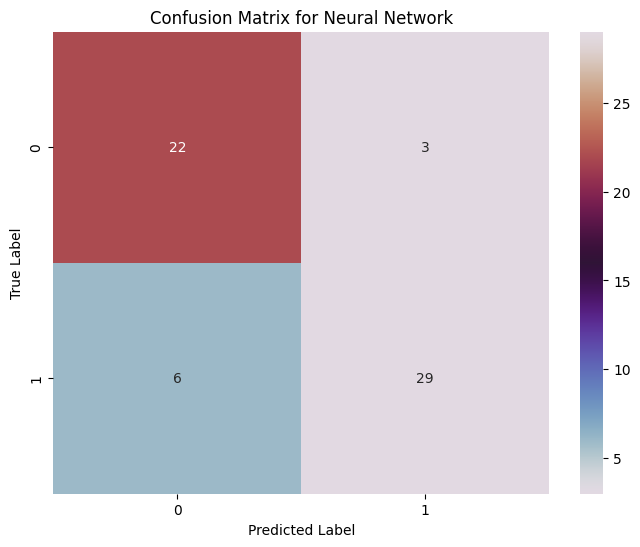

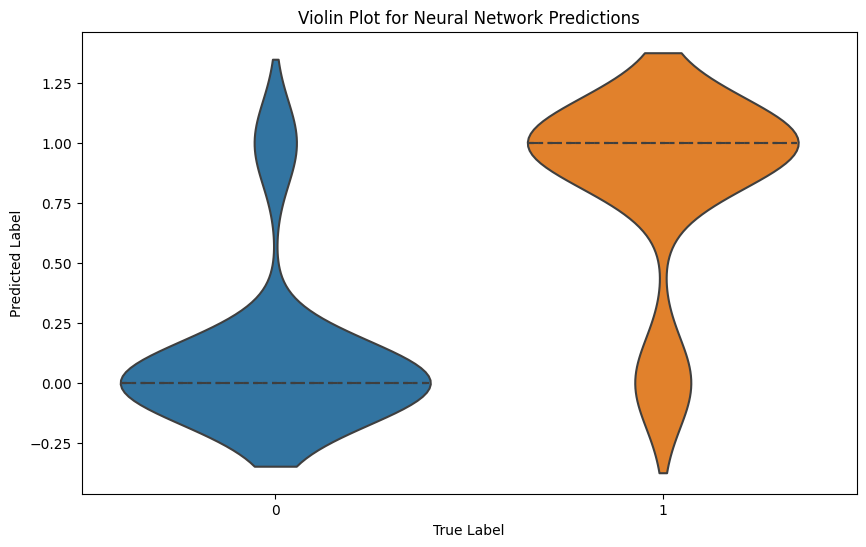

In [ ]:
from sklearn.neural_network import MLPClassifier
neural_net = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
neural_net.fit(train_set.drop(columns=['condition']), train_set['condition'])

# Make predictions on the validation set
nn_predict = neural_net.predict(validation.drop(columns=['condition']))

# Confusion Matrix for Neural Network
nn_conf_matrix = confusion_matrix(validation['condition'], nn_predict)
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix for Neural Network
plt.figure(figsize=(8, 6))
sns.heatmap(nn_conf_matrix, annot=True, fmt='d', cmap='twilight', xticklabels=neural_net.classes_, yticklabels=neural_net.classes_)
plt.title('Confusion Matrix for Neural Network')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

plot_data = pd.DataFrame({'True Label': validation['condition'], 'Predicted Label': nn_predict})
# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='True Label', y='Predicted Label', data=plot_data, cmap='plasma', inner='quartile')
plt.title('Violin Plot for Neural Network Predictions')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()



In this code I trains a Neural Network with 100 hidden units, predicts on a validation set, displays a confusion matrix heatmap, and visualizes predictions with a violin plot using seaborn and matplotlib.

**
In conclusion, the comprehensive analysis and implementation of various machine learning algorithms, including Linear Discriminant Analysis, Quadratic Discriminant Analysis, K-Nearest Neighbors, Support Vector Machine, Random Forest, and Gradient Boosting, showcase a meticulous approach to heart disease prediction. Leveraging the dataset's features, hyperparameter tuning, and model evaluation, the project not only offers valuable insights into predictive modeling but also addresses the pressing need for accurate cardiovascular disease diagnosis. This multifaceted approach lays the foundation for future advancements in heart disease prediction, highlighting the potential for enhanced healthcare outcomes through sophisticated machine learning applications.**